In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

In [3]:
#locating files
ams_weekday_csv = "Resources/amsterdam_weekdays.csv"
ams_weekend_csv = "Resources/amsterdam_weekends.csv"
lond_weekday_csv = "Resources/london_weekdays.csv"
lond_weekend_csv = "Resources/london_weekends.csv"
paris_weekday_csv = "Resources/paris_weekdays.csv"
paris_weekend_csv = "Resources/paris_weekends.csv"


In [4]:
#make files readable
ams_weekday_df = pd.read_csv(ams_weekday_csv)
ams_weekend_df = pd.read_csv(ams_weekend_csv)
lond_weekday_df = pd.read_csv(lond_weekday_csv)
lond_weekend_df = pd.read_csv(lond_weekend_csv)
paris_weekday_df = pd.read_csv(paris_weekday_csv)
paris_weekend_df = pd.read_csv(paris_weekend_csv)


In [5]:
#added column to each file to indicate if weekend or weekday line item
ams_weekday_df['Weekday or Weekend'] = 'Weekday'
ams_weekday_df['City'] = 'Amsterdam'
ams_weekend_df['Weekday or Weekend']= 'Weekend'
ams_weekend_df['City'] = 'Amsterdam'
lond_weekday_df['Weekday or Weekend'] = 'Weekday'
lond_weekday_df['City'] = 'London'
lond_weekend_df['Weekday or Weekend'] = 'Weekend'
lond_weekend_df['City'] = 'London'
paris_weekday_df['Weekday or Weekend'] = 'Weekday'
paris_weekday_df['City'] = 'Paris'
paris_weekend_df['Weekday or Weekend'] ='Weekend'
paris_weekend_df['City'] = 'Paris'

In [6]:
#stack files
complete_data_df = pd.concat([ams_weekday_df,ams_weekend_df,lond_weekday_df,lond_weekend_df,paris_weekday_df,paris_weekend_df], ignore_index=True)
complete_data_df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,Weekday or Weekend,City
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Weekday,Amsterdam
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Weekday,Amsterdam
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Weekday,Amsterdam
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Weekday,Amsterdam
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Weekday,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18756,3553,295.460900,Entire home/apt,False,False,4.0,False,0,0,9.0,...,3.660389,0.168146,209.752453,10.199228,540.326583,24.926525,2.38051,48.88393,Weekend,Paris
18757,3554,232.081275,Entire home/apt,False,False,4.0,False,0,0,10.0,...,3.558813,0.154703,185.486701,9.019304,474.351813,21.882955,2.40050,48.85093,Weekend,Paris
18758,3555,223.925809,Entire home/apt,False,False,2.0,False,1,0,9.0,...,4.205205,0.253029,172.658919,8.395552,406.585935,18.756757,2.40100,48.87700,Weekend,Paris
18759,3556,200.857489,Entire home/apt,False,False,2.0,True,0,0,9.0,...,2.891214,0.240674,235.167925,11.435057,602.451672,27.792500,2.38200,48.87400,Weekend,Paris


In [7]:
#list column names
complete_data_df.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'Weekday or Weekend', 'City'],
      dtype='object')

In [8]:
# drop some columns for easier processing
complete_data_df = complete_data_df.drop('attr_index',axis=1)
complete_data_df = complete_data_df.drop('attr_index_norm',axis=1)
complete_data_df = complete_data_df.drop('rest_index_norm',axis=1)
complete_data_df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,rest_index,lng,lat,Weekday or Weekend,City
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,98.253896,4.90569,52.41772,Weekday,Amsterdam
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,837.280757,4.90005,52.37432,Weekday,Amsterdam
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,95.386955,4.97512,52.36103,Weekday,Amsterdam
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,875.033098,4.89417,52.37663,Weekday,Amsterdam
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,815.305740,4.90051,52.37508,Weekday,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18756,3553,295.460900,Entire home/apt,False,False,4.0,False,0,0,9.0,80.0,1,3.660389,0.168146,540.326583,2.38051,48.88393,Weekend,Paris
18757,3554,232.081275,Entire home/apt,False,False,4.0,False,0,0,10.0,98.0,1,3.558813,0.154703,474.351813,2.40050,48.85093,Weekend,Paris
18758,3555,223.925809,Entire home/apt,False,False,2.0,False,1,0,9.0,89.0,1,4.205205,0.253029,406.585935,2.40100,48.87700,Weekend,Paris
18759,3556,200.857489,Entire home/apt,False,False,2.0,True,0,0,9.0,93.0,1,2.891214,0.240674,602.451672,2.38200,48.87400,Weekend,Paris


In [9]:
complete_data_df = complete_data_df.drop('rest_index',axis=1)
complete_data_df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,Weekday or Weekend,City
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,4.90569,52.41772,Weekday,Amsterdam
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,4.90005,52.37432,Weekday,Amsterdam
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,4.97512,52.36103,Weekday,Amsterdam
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,4.89417,52.37663,Weekday,Amsterdam
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,4.90051,52.37508,Weekday,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18756,3553,295.460900,Entire home/apt,False,False,4.0,False,0,0,9.0,80.0,1,3.660389,0.168146,2.38051,48.88393,Weekend,Paris
18757,3554,232.081275,Entire home/apt,False,False,4.0,False,0,0,10.0,98.0,1,3.558813,0.154703,2.40050,48.85093,Weekend,Paris
18758,3555,223.925809,Entire home/apt,False,False,2.0,False,1,0,9.0,89.0,1,4.205205,0.253029,2.40100,48.87700,Weekend,Paris
18759,3556,200.857489,Entire home/apt,False,False,2.0,True,0,0,9.0,93.0,1,2.891214,0.240674,2.38200,48.87400,Weekend,Paris


In [54]:
room_type_df = complete_data_df.groupby(["room_type","City"])
room_type_mean = room_type_df["realSum"].mean()
room_type_summary = pd.DataFrame({"Average Price per Room Type": room_type_mean})
room_type_summary.head(10)

Average Price per Room Type
room_type       City                                  
Entire home/apt Amsterdam                   734.699030
                London                      544.697933
                Paris                       425.107824
Private room    Amsterdam                   383.468718
                London                      220.400881
                Paris                       299.218870
Shared room     Amsterdam                   280.903616
                London                      179.820786
                Paris                       152.356013

In [36]:
room_type_city_ams = complete_data_df.loc[complete_data_df["City"] == "Amsterdam",:]
room_type_city_ams


,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,Weekday or Weekend,City
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,4.90569,52.41772,Weekday,Amsterdam
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,4.90005,52.37432,Weekday,Amsterdam
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,4.97512,52.36103,Weekday,Amsterdam
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,4.89417,52.37663,Weekday,Amsterdam
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,4.90051,52.37508,Weekday,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,972,473.132894,Entire home/apt,False,False,2.0,False,0,0,9.0,98.0,0,1.911795,1.723938,4.86742,52.36629,Weekend,Amsterdam
2076,973,491.645771,Entire home/apt,False,False,3.0,False,0,0,10.0,98.0,2,1.478016,1.465641,4.88066,52.38412,Weekend,Amsterdam
2077,974,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943031,0.388542,4.90688,52.35794,Weekend,Amsterdam
2078,975,399.315727,Entire home/apt,False,False,2.0,False,0,0,9.0,89.0,1,3.719001,0.882094,4.86056,52.34639,Weekend,Amsterdam


In [37]:
room_type_ams_count = room_type_city_ams["room_type"].value_counts()

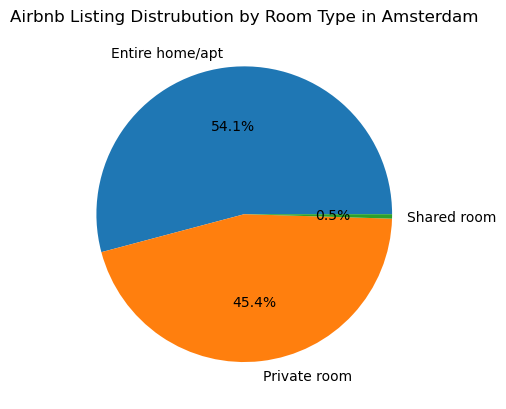

In [60]:
room_type_ams = room_type_ams_count
labels = room_type_ams.index.values
plt.pie(room_type_ams, labels=labels, autopct="%1.1f%%")
plt.title("Airbnb Listing Distrubution by Room Type in Amsterdam")
plt.show()

In [22]:
room_type_city_lon = complete_data_df.loc[complete_data_df["City"] == "London",:]
room_type_city_lon


,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,Weekday or Weekend,City
2080,0,570.098074,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,-0.16032,51.46531,Weekday,London
2081,1,297.984430,Private room,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,-0.09683,51.50343,Weekday,London
2082,2,336.790611,Private room,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,-0.10554,51.52407,Weekday,London
2083,3,226.722171,Private room,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,-0.16575,51.46292,Weekday,London
2084,4,256.355982,Private room,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,-0.12055,51.53728,Weekday,London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12068,5374,1035.066676,Private room,False,True,2.0,False,0,1,10.0,100.0,0,5.155373,0.883829,-0.05357,51.51255,Weekend,London
12069,5375,181.095510,Private room,False,True,2.0,False,1,0,10.0,100.0,1,5.072177,0.344055,-0.05620,51.51823,Weekend,London
12070,5376,420.517886,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,6.709982,0.926188,-0.22172,51.52180,Weekend,London
12071,5377,217.314612,Private room,False,True,2.0,False,0,0,10.0,94.0,1,6.736940,0.353634,-0.22286,51.49715,Weekend,London


In [39]:
room_type_lon_count = room_type_city_lon["room_type"].value_counts()

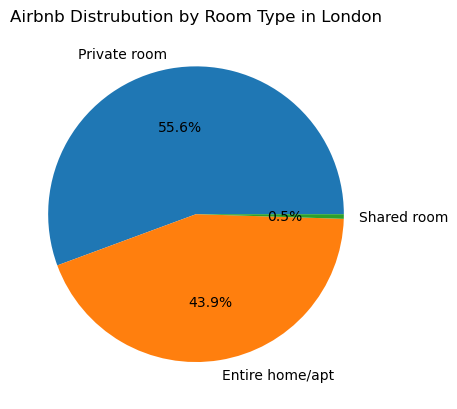

In [45]:
room_type_london = room_type_lon_count
labels = room_type_london.index.values
plt.pie(room_type_london, labels=labels, autopct="%1.1f%%")
plt.title("Airbnb Listing Distrubution by Room Type in London")
plt.show()

In [26]:
room_type_city_par = complete_data_df.loc[complete_data_df["City"] == "Paris",:]
room_type_city_par

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,Weekday or Weekend,City
12073,0,296.159940,Private room,False,True,2.0,True,0,0,10.0,97.0,1,0.699821,0.193709,2.35385,48.86282,Weekday,Paris
12074,1,288.237487,Private room,False,True,2.0,True,0,0,10.0,97.0,1,2.100005,0.107221,2.32436,48.85902,Weekday,Paris
12075,2,211.343089,Private room,False,True,2.0,False,0,0,10.0,94.0,1,3.302325,0.234724,2.31714,48.87475,Weekday,Paris
12076,3,298.956100,Entire home/apt,False,False,2.0,False,0,1,9.0,91.0,1,0.547567,0.195997,2.35600,48.86100,Weekday,Paris
12077,4,247.926181,Entire home/apt,False,False,4.0,False,0,0,7.0,82.0,1,1.197921,0.103573,2.35915,48.86648,Weekday,Paris
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18756,3553,295.460900,Entire home/apt,False,False,4.0,False,0,0,9.0,80.0,1,3.660389,0.168146,2.38051,48.88393,Weekend,Paris
18757,3554,232.081275,Entire home/apt,False,False,4.0,False,0,0,10.0,98.0,1,3.558813,0.154703,2.40050,48.85093,Weekend,Paris
18758,3555,223.925809,Entire home/apt,False,False,2.0,False,1,0,9.0,89.0,1,4.205205,0.253029,2.40100,48.87700,Weekend,Paris
18759,3556,200.857489,Entire home/apt,False,False,2.0,True,0,0,9.0,93.0,1,2.891214,0.240674,2.38200,48.87400,Weekend,Paris


In [42]:
room_type_par_count = room_type_city_par["room_type"].value_counts()

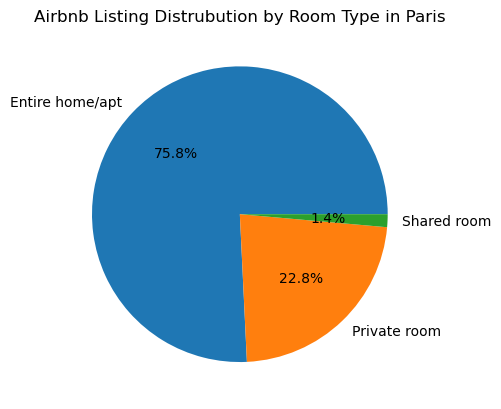

In [59]:
room_type_paris = room_type_par_count
labels = room_type_paris.index.values
plt.pie(room_type_paris, labels=labels, autopct="%1.1f%%")
plt.title("Airbnb Listing Distrubution by Room Type in Paris")
plt.show()

The correlation between cleanliness and guest satisfaction is 0.72


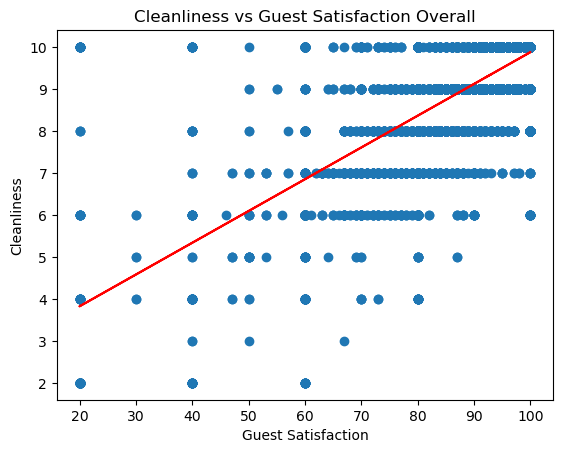

In [57]:
# Correlation between cleanliness and guest satisfaction
# Calculate the correlation coefficient and linear regression model 
cleanliness_df = complete_data_df ["cleanliness_rating"]
guest_satisfaction = complete_data_df["guest_satisfaction_overall"]

x_values = guest_satisfaction
y_values = cleanliness_df
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between cleanliness and guest satisfaction is {correlation}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="r")
plt.title ("Cleanliness vs Guest Satisfaction Overall")
plt.ylabel("Cleanliness")
plt.xlabel('Guest Satisfaction')
plt.show()


Analysis: When looking at the scatterplot shown here, the correlation between cleanliness and guest satisfaction yeilds a strong r value, meaning there is a strong correlation. The cleaner the airbnb the higher the guest will rate the airbnb in the guest satisfaction catergory